# <center> Matplotlib

In [20]:
import pandas as pd
#используем объединенный датасет о заболеваемости и вакцинации
covid_df = pd.read_csv('data/covid_df.csv') 
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


## <center> Графические возможности библиотеки matplotlib

Matplotlib - это библиотека Python, обладающая большим количеством возможностей для визуализации и настройки отображения графиков и диаграмм.

In [3]:
#!pip install matplotlib

За визуализацию графиков в matplotlib отвечает модуль pyplot. Традиционно он импортируется под псевдонимом plt. К тому же для более корректного отображения графиков в Jupiter используется команда %matplotlib inline

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Примечание. Если вы используете тёмную тему в VS Code, то для корректного отображения графиков на тёмном фоне выполните следующую команду по установке стиля отображения:

In [5]:
plt.style.use('default')

### ОСНОВНЫЕ ОБЪЕКТЫ MATPLOTLIB

Библиотека Matplotlib позволяет работать в нескольких режимах. Самый распространённый и мощный по функционалу — объектно-ориентированный режим. Он основан на работе с объектами фигур (figure, их ещё называют канвасами или холстами) и координатных плоскостей (axes, или системы координат). 

На рисунке ниже представлена визуализация основных компонентов графика в Matplotlib:

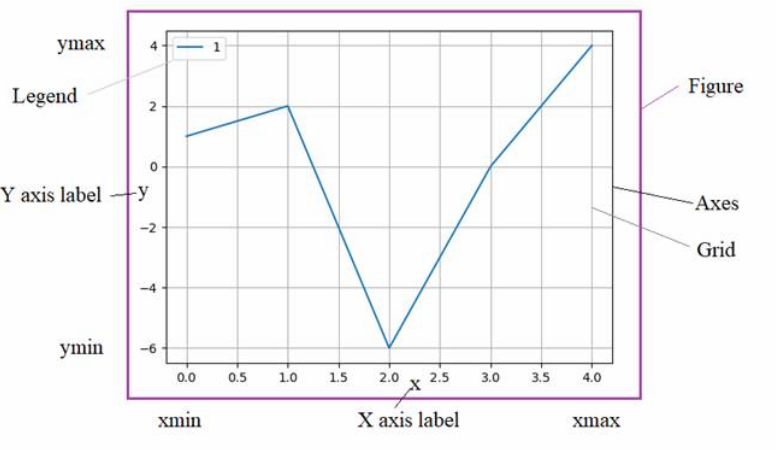

Процесс работы над графиком максимально прозрачен: сначала создаётся объект фигуры (fig) , содержащий необходимую информацию и настройки, например размер в дюймах (figsize, восемь дюймов в ширину, четыре — в высоту). К этому объекту с помощью метода add_axes() добавляется координатная плоскость, а на ней располагаются графические объекты. Для создания координатной плоскости необходимо указать её расположение на фигуре в виде списка из координат. В нашем случае она начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает всё отведённое место в области (100%, ширина и высота равны 1).

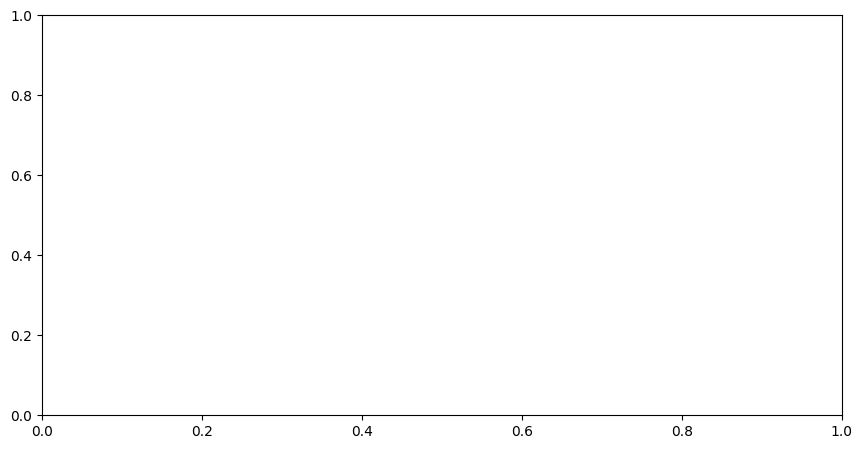

In [6]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1])

Теперь на созданной системе координат мы можем построить график. 

Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронавирусной инфекцией (но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.

У объекта координатной плоскости axes вызовем метод scatter().

Основные параметры метода scatter()

x, y — последовательности, которые будут отложены по осям абсцисс и ординат;    
s — размер маркеров;    
marker — вид маркеров ('o' — точки, '^' — треугольники);    
c — цвет маркеров.  

На диаграмме рассеяния по оси абсцисс откладываем суммарное число поставленных вакцин, а по оси ординат — ежедневный прирост заболевших:

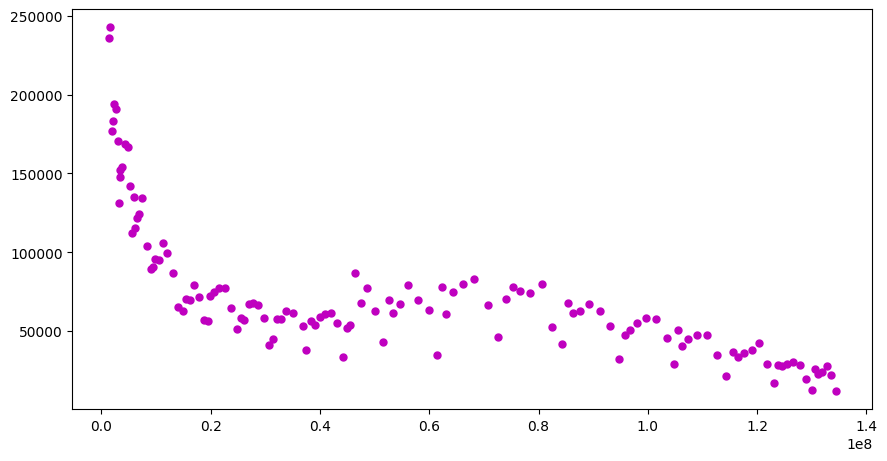

In [17]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='.',
    c = 'm'
);

Из диаграммы видно, что, в основном, с ростом числа привитых вторым компонентом людей заболеваемость падает, замедляясь на уровне около 50 тысяч заболевших в день, и продолжает снижение дальше.

#### Построим круговую диаграмму, чтобы отобразить ТОП-10 комбинаций вакцин в мире.

Примечание. Обратите внимание, что под «распространённостью» вакцины здесь подразумевается не количество введённых доз (таких данных у нас в таблице нет), а количество стран, в которых она используется. При этом подсчёт ведётся не по каждой отдельной вакцине, а по их комбинациям, и одна и та же вакцина учитывается несколько раз в сочетаниях с другими.

Для построения круговых диаграмм в Matplotlib используется метод pie().

Основные параметры метода pie()

x — значения, по которым будет строиться круговая диаграмма;    
labels — метки, соответствующие значениям;  
autopct — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");    
explode — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x. 

ТОП-10 комбинаций вакцин (vaccines) по распространённости мы находим с помощью метода value_counts(). Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы. Будем отображать доли в процентах и округлять их до одного знака после запятой. Самую распространённую вакцину сместим на 10 % от центра:

vaccines
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech        3059
Oxford/AstraZeneca                                                   1340
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         1293
Oxford/AstraZeneca, Sinopharm/Beijing                                1280
Oxford/AstraZeneca, Pfizer/BioNTech                                  1082
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V     830
Moderna, Pfizer/BioNTech                                              818
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing                440
Pfizer/BioNTech                                                       404
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V               401
Name: count, dtype: int64


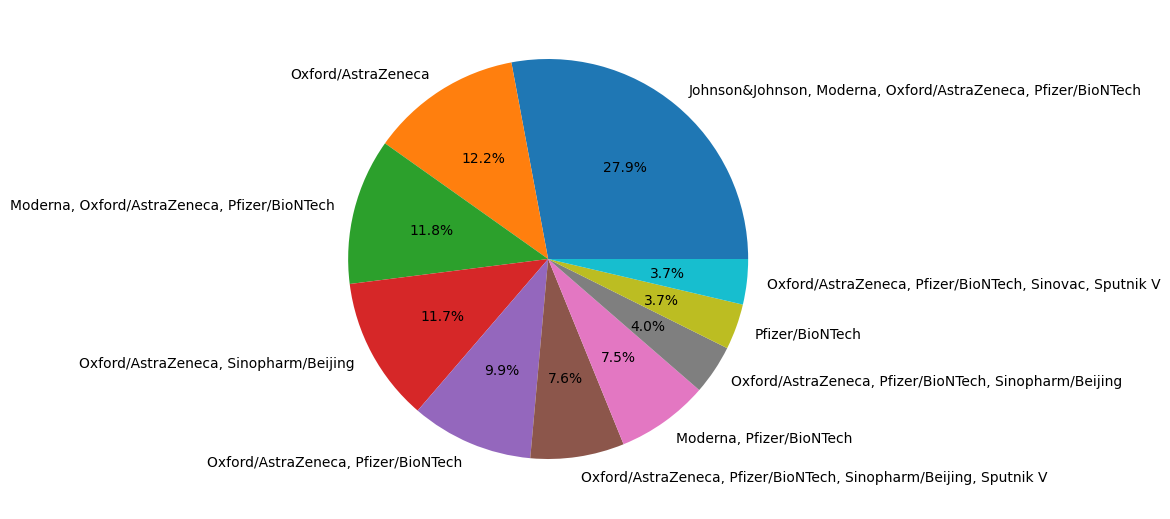

In [21]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
)
print(vaccine_combinations)

### ДОБАВЛЕНИЕ ИНФОРМАТИВНОСТИ В ГРАФИКИ

Вы наверное заметили, что до этого мы не подписывали графики. График не имеет смысла, если без лишних слов непонятно, что на нем изображено. Управлять информативностью графика можно с помощью методов координатной плоскости axes. Перечислим основные из них (не пугайтесь, запоминать их не обязательно, вы всегда сможете подсмотреть их в документации):

* axes.set_title() - заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта)
* axes.set_xlabel() - название оси абсцисс
* axes.set_ylabel() - название оси ординат
* axes.set_xticks() - установка отметок на оси абсцисс
* axes.set_yticks() - установка отметок на оси ординат
* axes.xaxis.set_tick_params() - управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах)
* axes.yaxis.set_tick_params()  - управление параметрами отметок на оси ординат
* axes.legend() - отображение легенды
* axes.grid() - установка сетки


Для построения линейных графиков в Matplotlib используется метод plot() (не путайте с методом plot() в Pandas!). При вызове метода без параметров по оси ординат откладываются значения столбца таблицы, по оси абсцисс — индексы (в нашем случае это будут даты). 

Дополнительно в параметрах метода указываем параметр label — название графика, которое будет отображаться на легенде, а также lw — ширину линии графика. Добавим к графику заголовок, названия осей, установим метки по оси y с частотой в 10 000, повернём метки по оси x на 30 градусов, а также добавим легенду (метки для легенды выставляются в параметре label метода plot()):

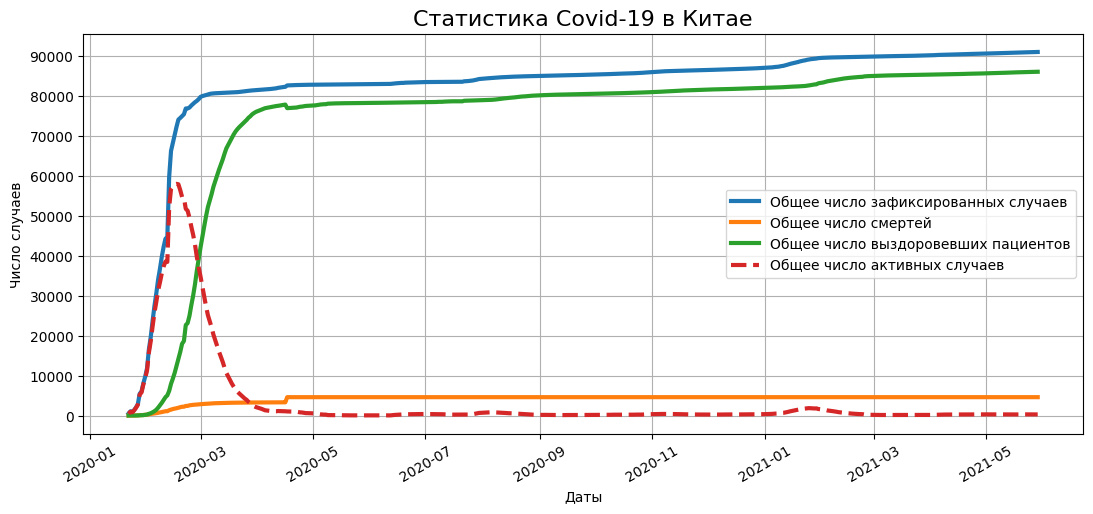

In [9]:
china_data = covid_df[covid_df['country'] == 'China'].sort_values(by='date')
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend()

На графике наблюдается резкий рост заболеваемости на начальном периоде до середины февраля 2020 года, после чего видно резкое падение числа активных случаев (примерно в этот период власти Китая ввели тотальный локдаун и прекратили транспортное сообщение со всем миром). Далее число активных случаев только падает, а темп прироста числа заболевших снижается. При этом общее число смертей в Китае остаётся практически на одном уровне (около 5 тысяч), уже начиная с мая 2020 года (новые пациенты умирают крайне редко).

Стоит обратить внимание на сдвиги в графиках. Они являются свидетельством противоречия в данных: общее число выздоровевших пациентов почему-то резко упало, а число умерших возросло. Почему так произошло? Произошёл пересчёт числа заболевших? Данные были утеряны или искажены? Если вы в своей практике столкнётесь с такими же противоречиями, вам необходимо будет обратиться к первоисточнику, чтобы выяснить причину.

### ИСПОЛЬЗОВАНИЕ НЕСКОЛЬКИХ СИСТЕМ КООРДИНАТ

При использовании библиотеки Matplotlib вовсе не обязательно ограничиваться одной системой координат.

Вы можете размещать несколько систем координат на одной фигуре, что позволит нам отображать вспомогательную информацию на основном графике.

Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

Например, отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (people_fully_vaccinated), а также ТОП-5 стран по числу полностью привитых на 100 человек населения (people_fully_vaccinated_per_hundred).

Для этого построим столбчатые диаграммы с помощью метода bar().

Основные параметры метода bar()

x — названия категорий, которые будут располагаться по оси абсцисс;     
height — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.);  
width — ширина столбцов диаграммы;  
color — цвет.   

Группируем таблицу по странам, находим последний по дате зафиксированный показатель с помощью метода last() и выбираем ТОП-5 стран с использованием метода nlargest().

При отображении графиков создаём две координатные плоскости main_axes и insert_axes, на каждой из них отдельно строим столбчатые диаграммы.

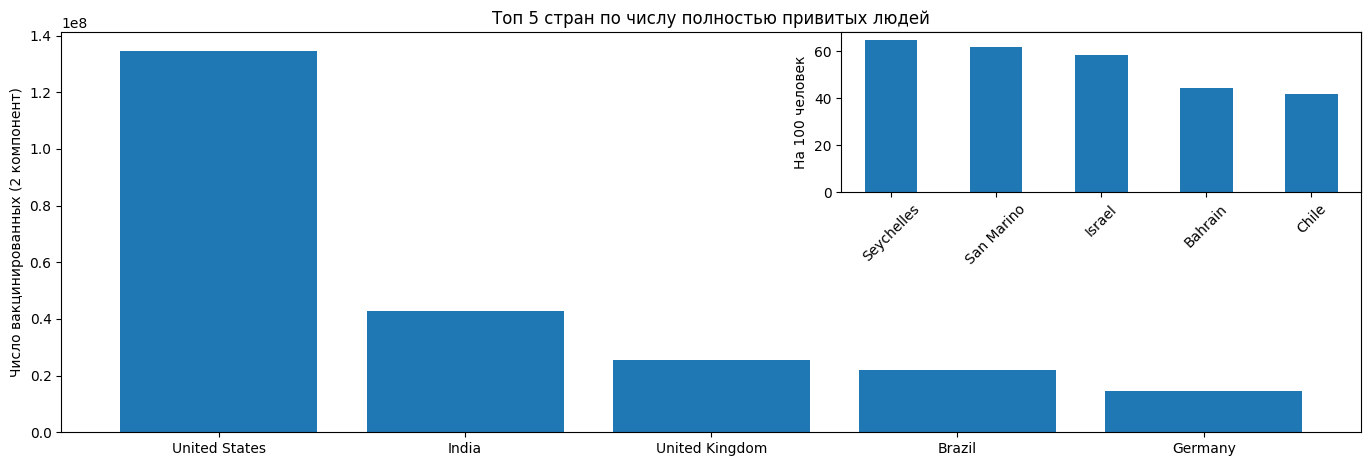

In [24]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(
    x = vacc_country.index,
    height = vacc_country,
    )
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.4, 0.4])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

Нетрудно заметить, что два представленных рейтинга отличаются: лидером по числу полностью привитых является США, а вот по числу вакцин на 100 человек населения — Сейшелы. В первый список попали страны с большим количеством населения, которое они активно прививают. Во второй список попали маленькие страны, которые проще всего обеспечить вакциной.

В наш ТОП не попали страны, которые пользуются однокомпонентной вакциной, например Китай.

### SUBPLOTS

Создание дополнительных систем координат с помощью метода add_axes() полезно, однако используется не так часто.

В большинстве случаев для отображения нескольких систем координат используется функция subplots(). Она создаёт целую таблицу из систем координат на одной фигуре. Функция возвращает новую фигуру, а также список координатных плоскостей.

Основные параметры метода subplots()

nrows — число строк;    
ncols — число столбцов;     
figsize — общий размер фигуры в дюймах (ширина и высота).   

Например, следующий код создаст шесть координатных плоскостей, сведённых в таблицу размера 2x3:

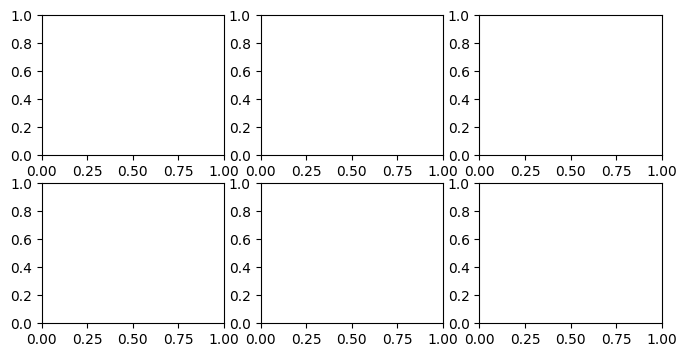

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 4))

Теперь, обладая знаниями о методе subplots(), построим три графика:

Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.  
Линейный график изменения ежедневной заболеваемости в стране.   
Гистограмму ежедневной заболеваемости в стране. 
 
За построение гистограмм в библиотеке Matplotlib отвечает метод hist(). 

Основные параметры метода hist()

x — массив чисел, для которого строится гистограмма;    
bins — число столбцов (корзин);     
orientation — ориентация гистограммы (по умолчанию 'vertical');     
color — цвет.   

Фильтруем таблицу covid_df по признаку страны и выбираем записи только для России.

Для того чтобы отобразить график в соответствующей координатной плоскости, нужно обратиться к списку axes по индексу (от 0 до 2). Дальнейшая настройка графиков вам уже известна.

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
64183,64183,2020-01-31,Russia,2.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
64184,64184,2020-02-01,Russia,2.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
64185,64185,2020-02-02,Russia,2.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
64186,64186,2020-02-03,Russia,2.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
64187,64187,2020-02-04,Russia,2.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64663,64663,2021-05-25,Russia,4960174.0,117197.0,4579421.0,263556.0,7762.0,385.0,8579.0,27026797.0,15768938.0,10.81,11257859.0,7.72,358224.0,"EpiVacCorona, Sputnik V",2.362760,92.323798
64664,64664,2021-05-26,Russia,4968421.0,117595.0,4588421.0,262405.0,8247.0,398.0,9000.0,27611859.0,16159658.0,11.07,11452201.0,7.85,392708.0,"EpiVacCorona, Sputnik V",2.366849,92.351695
64665,64665,2021-05-27,Russia,4977332.0,117990.0,4598014.0,261328.0,8911.0,395.0,9593.0,27739956.0,16225813.0,11.12,11514143.0,7.89,367571.0,"EpiVacCorona, Sputnik V",2.370547,92.379090
64666,64666,2021-05-28,Russia,4986458.0,118386.0,4607276.0,260796.0,9126.0,396.0,9262.0,28112894.0,16331436.0,11.19,11781458.0,8.07,377834.0,"EpiVacCorona, Sputnik V",2.374150,92.395765


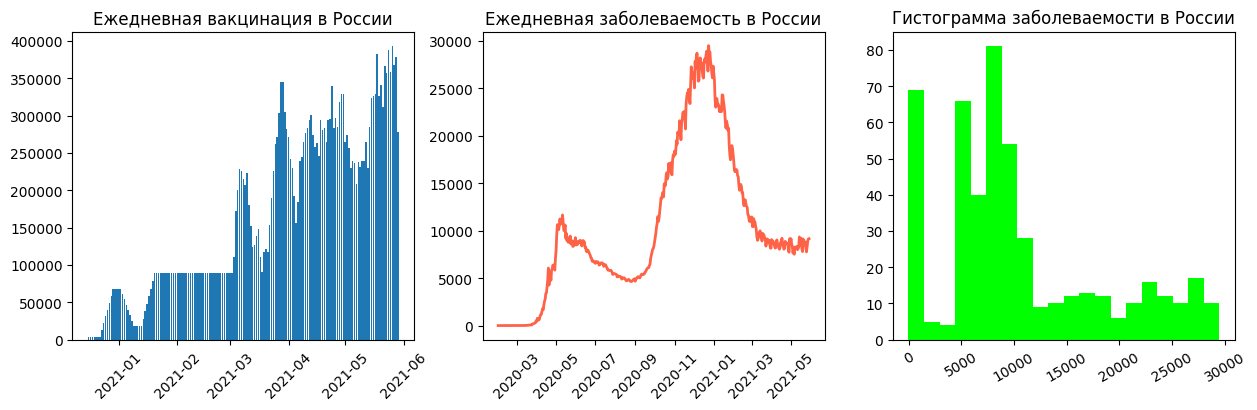

In [28]:
russia_data = covid_df[covid_df['country'] == 'Russia']

#визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
#столбчатая диаграмма
axes[0].bar(x=russia_data['date'], 
            height=russia_data['daily_vaccinations'],
            label='Число вакцинированных')
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

#линейный график
axes[1].plot(russia_data['date'],
             russia_data['daily_confirmed'],
             label='Число заболевших',
             color='tomato', lw=2)
axes[1].set_title('Ежедневная заболеваемость в России')
axes[1].xaxis.set_tick_params(rotation=45)

#гистограмма
axes[2].hist(x=russia_data['daily_confirmed'],
             label=['Число заболевших'], 
             color='lime', bins = 20)
axes[2].set_title('Гистограмма заболеваемости в России');
axes[2].xaxis.set_tick_params(rotation=30)
display(russia_data)

На первом графике можно наблюдать колеблющийся рост числа ежедневно вакцинированных людей. Особенно в глаза бросается «пенёк» в период с конца января до начала марта 2021 года. Это период, когда данные о процессе вакцинации людей не обновлялись.

На втором графике мы видим две волны коронавируса в России. Первая — в середине марта 2020 года, которая достигла максимума в 13 тысяч заболевших за сутки. Вторая волна, судя по графику, началась в октябре 2020 года и достигла своего пика почти в 30 тысяч заболевших за сутки в конце декабря этого же года (точные данные: 24 декабря было зафиксировано рекордное число подтверждённых случаев: 29935).

Далее с ростом показателей вакцинации и введением новых карантинных мер заболеваемость снова постепенно снижается.

На третьем графике можно увидеть, что большая часть наблюдений ежедневной заболеваемости находится в интервале от 5 до до 10 тысяч человек в день. Ещё один пик гистограммы находится около 0 — это случаи, зафиксированные на начальных этапах эпидемии (в Россию Covid-19 пришёл позже, чем во многие другие страны).

Задание 5.5
Дан код для отрисовки основной системы координат: 
  
fig = plt.figure(figsize=(13, 4))   
main_axes = fig.add_axes([0, 0, 1, 1])  

Выберите правильный набор параметров, позволяющих разместить вспомогательную ось так, как показано на заготовке графика ниже.

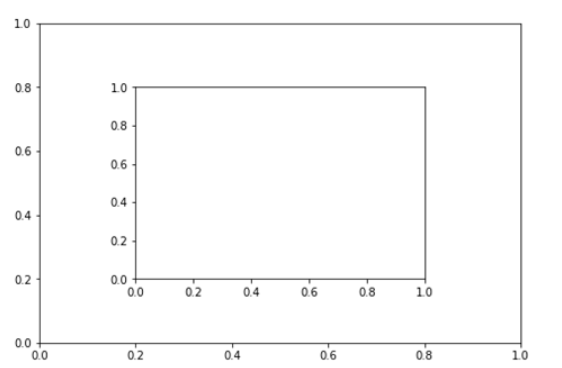

Ответ:

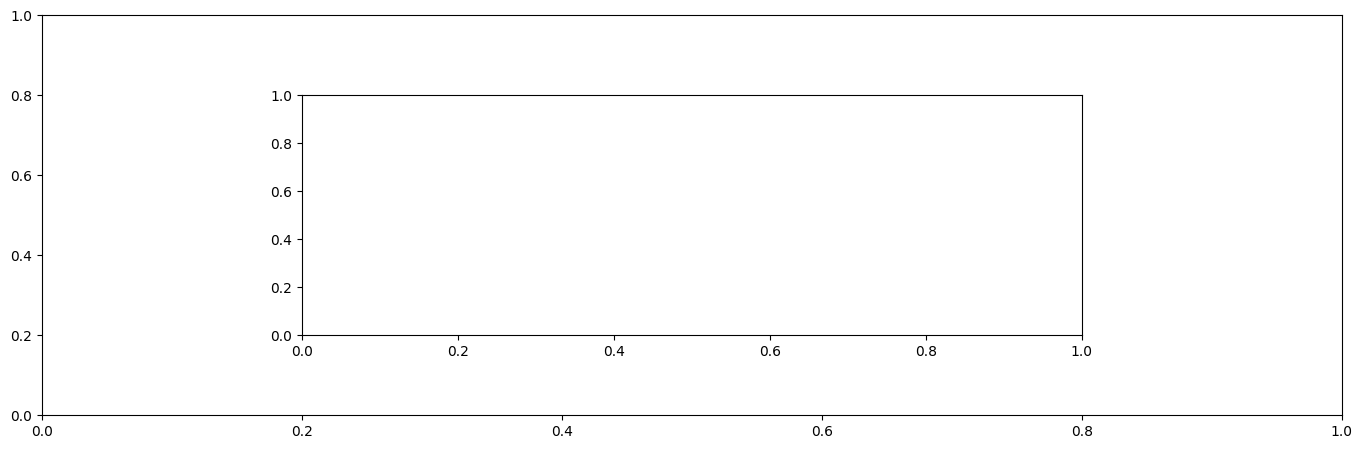

In [29]:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.2, 0.2, 0.6, 0.6])